In [23]:
import numpy as np
import corner
import matplotlib as mpl
from matplotlib import rcParams
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import sys
sys.path.append('../scripts')
import compute_sigmalm0_SimIMREOBGenerateQNMFreqV2 as calcqnm

%matplotlib inline
rcParams["font.size"] = 16
rcParams["font.family"] = "serif"
rcParams["axes.labelsize"] = 25
mpl.rcParams['text.usetex'] = True


In [26]:
seob_loc_gr = '../runs/XLALSimInspiralChooseTDWaveformFromCache_runs/ligo_events/S190521g/C01/GR/cbcBayes/posterior_samples.dat'
data = np.genfromtxt(seob_loc_gr, names=True, dtype=None)
m1, m2, a1z, a2z = data['m1'], data['m2'], data['a1z'], data['a2z']
lm = [2,2]

# create (omega, tau) GR and modGRarrays
omega_GR, tau_GR = calcqnm.get_sigmalm0SI_GR(m1, m2, a1z, a2z, lm)
freq_GR = omega_GR/(2.*np.pi)

f_seob_gr = freq_GR
tau_seob_gr = tau_GR

In [27]:
f220tau220=np.genfromtxt('./qnmtest_abs_params_f_tau_modGR_data.dat', names=True)
imrexp30=np.genfromtxt('./samples_EXP30.dat', names=True)

In [28]:
#using fitting formulas from https://arxiv.org/pdf/gr-qc/0512160.pdf to get final mass and final spin from omega220 and tau220. 
#See eqs.2.1, E1 and E2, and table VIII for fitting coefficients

Msun = 1.98847*10**30
G = 6.67408*10**(-11)
cc = 299792458

def Mjfinal220(omega220,tau220):
    
    jf=1-pow((omega220*tau220/2.-0.7)/(1.4187),-1/0.4990)
    Mf=((1.5251 - 1.1568*pow((1 - jf),0.1292))/omega220)*(pow(cc,3)/G/Msun)

    return Mf,jf

In [29]:
MJ1=Mjfinal220(f220tau220['freq_modGR']*(2*np.pi),f220tau220['tau_modGR'])
MJ2=Mjfinal220(f_seob_gr*(2*np.pi),tau_seob_gr)

In [30]:
mfaf1=np.column_stack((MJ1[0],MJ1[1]))
mfaf2=np.column_stack((MJ2[0],MJ2[1]))
#np.savetxt('mfaf_modGR.dat', mfaf, delimiter='  ')

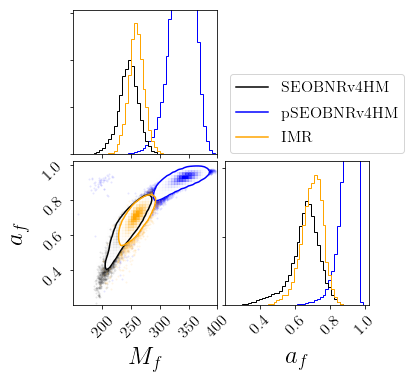

In [33]:
qnmmodes1 = np.vstack([mfaf1[:,0],
                      mfaf1[:,1]])

qnmmodes2 = np.vstack([mfaf2[:,0],
                      mfaf2[:,1]])

IMR = np.vstack([imrexp30['mf'],imrexp30['af']])


fig = corner.corner(np.transpose(qnmmodes1),
                    labels=[r'$M_f$',
                            r'$a_f$'],
                    smooth=True,color='blue',truth_color='grey',bins=50,
                    plot_contours=True,levels=([0.95]),range=([150,400],[0.2,1.02]),
                    plot_datapoints=True)

fig2 = corner.corner(np.transpose(qnmmodes2),
                    labels=[r'$M_f$',
                            r'$a_f$'],
                    smooth=True,color='black',bins=50,
                    plot_contours=True,levels=([0.9]),
                    range=([150,400],[0.2,1.02]),plot_datapoints=True,fig=fig)

corner.corner(np.transpose(IMR),
                    labels=[r'$M_f$',
                            r'$a_f$'],
                    smooth=True,color='orange',bins=50,
                    plot_contours=True,levels=([0.9]),
                    range=([150,400],[0.2,1.02]),plot_datapoints=True,fig=fig2)

black_line = mlines.Line2D([], [], color='black', label='SEOBNRv4HM')
blue_line = mlines.Line2D([], [], color='blue', label='pSEOBNRv4HM')
orange_line = mlines.Line2D([], [], color='orange', label='IMR')

plt.legend(handles=[black_line,blue_line,orange_line], bbox_to_anchor=(0.3, 1.0, 1., .0), loc=4)


fig.show()

In [34]:
Msun = 1.9885469549614615*10**30
G = 6.67408*10**(-11)
clight = 299792458

def omegaphys(Mf,af):
    
    f=(1.5251 - 1.1568*pow((1 - af),0.1292))/(2.*np.pi*Mf*Msun*G/(clight**2)/clight)
    tau=1/((1/2.)*(2.*np.pi*f/(0.7000 + 1.4187*pow((1 - af),-0.4990))))

    return f,tau

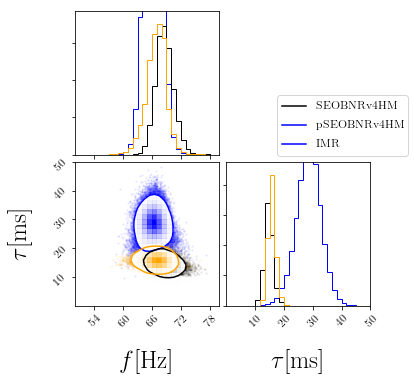

In [37]:
from matplotlib import rcParams
import matplotlib.lines as mlines

rcParams["font.size"] = 12
rcParams["font.family"] = "serif"
rcParams["axes.labelsize"] = 25

qnmmodes1 = np.vstack([f220tau220['freq_modGR'],1000*f220tau220['tau_modGR']])
qnmmodes2 = np.vstack([f_seob_gr,1000*tau_seob_gr])

IMR = np.vstack([(omegaphys(imrexp30['mf'],imrexp30['af'])[0]),
                     1000*(omegaphys(imrexp30['mf'],imrexp30['af'])[1])])

fig = corner.corner(np.transpose(qnmmodes1),
                    labels=[r'$f$[Hz]',
                            r'$\tau$[ms]'],
                    smooth=True,color='blue',bins=30,
                    plot_contours=True,levels=([0.9]),
                    plot_datapoints=True,range=([50,80], [0,50]),truth_color='black')

fig2 = corner.corner(np.transpose(qnmmodes2),
                    labels=[r'$f$[Hz]',
                            r'$\tau$[ms]'],
                    smooth=True,hist_bin_factor=([2]),color='black',bins=30,
                    plot_contours=True,levels=([0.9]),
                    plot_datapoints=True,range=([50,80], [0,50]),fig=fig)
                 
corner.corner(np.transpose(IMR),
                    labels=[r'$f$[Hz]',
                            r'$\tau$[ms]'],
                    smooth=True,hist_bin_factor=([2]),color='orange',bins=30,
                    plot_contours=True,levels=([0.9]),
                    plot_datapoints=True,range=([50,80], [0,50]),fig=fig2)

black_line = mlines.Line2D([], [], color='black', label='SEOBNRv4HM')
blue_line = mlines.Line2D([], [], color='blue', label='pSEOBNRv4HM')
orange_line = mlines.Line2D([], [], color='blue', label='IMR')

plt.legend(handles=[black_line,blue_line,orange_line], bbox_to_anchor=(0.3, 1.0, 1., .0), loc=4)


fig.show()